In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
def TD(stateValue, alpha, batch=False):
    episode = [3]
    reward = [0]
    currentState = 3
    
    while True:
        oldState = currentState
        if Prob_LeftAction==np.random.binomial(1, 0.5):
            currentState -=1
        else:
            currentState +=1
        episode.append(currentState)
        #TD(0) update rule - online update
        if batch==False:
            stateValue[oldState] += alpha*(stateValue[currentState] - stateValue[oldState])
        #if terminating state reached
        if currentState==0 or currentState==6:
            break
        reward.append(0)
        
    return episode, reward

In [3]:
def MC(stateValue, alpha, batch=False):
    episode = [3]
    returns = 0.0
    currentState = 3
    
    while True:
        if Prob_LeftAction==np.random.binomial(1, 0.5):
            currentState -=1
        else:
            currentState +=1
        episode.append(currentState)
        #if terminating state reached
        if currentState==0:
            break
        elif currentState==6:
            returns=1.0
            break
     
    if batch==False:
        #MC update rule - offline update
        for state1 in episode[:-1]:
            stateValue[state1] += alpha*(returns - stateValue[state1]) 
    
    length_episode = len(episode)-1
    return episode, [returns]*length_episode

In [4]:
def figure1new():
    stateValues = np.copy(Estimate_StateValue)
    plt.figure(1)
    for iterations in range(0,101):
        if iterations==0 or iterations==1 or iterations==10 or iterations==100:
            temp = [stateValues[i] for i in range(1,6)]
            plt.plot([1,2,3,4,5],temp, label=str(iterations))
        TD(stateValues, 0.1)
    temp = [True_StateValue[i] for i in range(1,6)]
    plt.plot([1,2,3,4,5],temp, label='True Values')
    plt.xlabel('State')
    plt.ylabel('Estimated Value')
    plt.legend()

In [5]:
def figure2():
    alpha_MC = [0.01, 0.02, 0.03, 0.04]
    alpha_TD = [0.05, 0.1, 0.15]
    alphaList = [0.05, 0.1, 0.15, 0.01, 0.02, 0.03, 0.04]
    
    for iteration in range(0,7):
        rmsError = np.zeros(101)
        method = ''
        ls = ''
        if iteration<3:
            method = 'TD'
            ls = 'solid'
        else:
            method = 'MC'
            ls = 'dashdot'
        
        for run in range(100):
            eL = []
            currentStateValue = np.copy(Estimate_StateValue)
            for i in range(0, 101):
                eL.append(np.sqrt(np.sum(np.power(True_StateValue - currentStateValue, 2))/5.0))
                if method == 'TD':
                    TD(currentStateValue, alphaList[iteration])
                else:
                    MC(currentStateValue, alphaList[iteration])
            rmsError += np.asarray(eL)
        rmsError /= 100
        st = str(alphaList[iteration])+" "
        plt.plot(rmsError, linestyle=ls, label='alpha= '+st+method)
    plt.xlabel('Walks/Episodes')
    plt.ylabel('Empirical RMS error, averaged over states')
    plt.legend()


In [6]:
# Initialization
True_StateValue = np.zeros(7)
True_StateValue[6] = 1
for i in range(1,6):
    True_StateValue[i] = i/6.0

Estimate_StateValue = np.zeros(7)
Estimate_StateValue[6] = 1
for i in range(1,6):
    Estimate_StateValue[i] = 1/2.0
    
# initial policy
Prob_RightAction = 1
Prob_LeftAction = 0

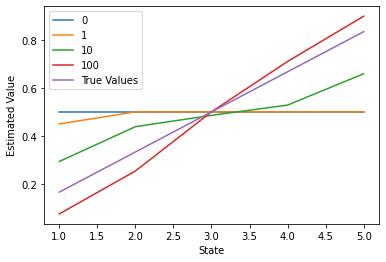

In [7]:
figure1new()

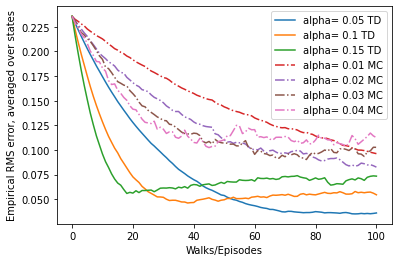

In [8]:
figure2()

### Question 6.3

All state values are initialized with 0.5 as can be seen from episode 0 of the graph. After 1st episode, only V(A) changes. This implies that the episodes terminates by going left from A (if episode had terminated after going right from E, then V(E) would've reflected a change after 1st episode, not V(A))
Since all states have initial value 0.5, the intermediate states would not change after the 1st episode. Suppose we go from state C to B. Then V(C) = V(C) + alpha(reward + gamma*(V(B)-V(C))) => V(C) = 0.5 + 0.1(0+0.5-0.5) = 0.5. Thus, intermediate states (states that are visited from starting state C till the termination of episode)  do not see any change in their state values after 1st episode.
V(A) = V(A) + alpha(reward + gamma*(V(left_terminal_state)-V(A))) => V(A) = 0.5 + 0.1(0-0.5) = 0.45
Thus, estimate for A decreases by 0.05.

### Question 6.4

Alpha shoud be chosen to be sufficiently small for convergence in both TD and MC methods. Smaller values of alpha would result in lower root mean square error (as can be seen from figure 2) and thus performs better than choosing large values of alpha. So, wider range of alpha would not affect the algorithm. There is no ﬁxed value of alpha at which either algorithm would have performed signiﬁcantly better, however both algorithms would perform  worse if alpha is taken to be too large. Moreover, choosing alpha to be gradually decreasing with the number of times state is visited (say count(s)) would perform better(as long as alpha follows the convergence conditions, eg alpha can be 1/count(s)) than constant alpha.

### Question 6.5

Higher values of alpha lead to more RMS error than smaller values of alpha. All state values are intialized with 0.5 which might be too optimisitc for some state values. This over-estimation of initial state values might lead to fluctuations in the RMS error graph for higher alphas as higher alpha give more weight to the old value estimates.